# Resources

* Aladdin Persson: DCGAN implementation from scratch.

https://www.youtube.com/watch?v=IZtv9s_Wx9I

https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/GANs/2.%20DCGAN

* Aladdin Persson: CycleGAN.

https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/GANs/CycleGAN

* Aladdin Persson: WGAN.

https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/GANs/3.%20WGAN

* DCGAN paper:

https://arxiv.org/abs/1511.06434

* MachineLearningMastery: How to Identify and Diagnose GAN Failure Modes.


https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/

* MachineLearningMastery: How to Implement the Inception Score (IS) for Evaluating GANs.

https://machinelearningmastery.com/how-to-implement-the-inception-score-from-scratch-for-evaluating-generated-images/

* MachineLearningMastery: How to Implement the Frechet Inception Distance (FID) for Evaluating GANs.

https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/






https://www.reddit.com/r/learnmachinelearning/comments/17cma9u/some_things_i_learned_about_gan_training/


Evaluation:

* Manual: inference and saving model regularly during training and comparing results post training.
* Implement WGAN-GP
* Implement Conditional GAN ?

# To do list

* include FID and IS in loop
* Clean loop
* Display generated images every epoch/less
* Export GAN Models for faster notebooks


In [3]:
!nvidia-smi

Wed Dec 20 10:46:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   32C    P8    14W /  70W |      2MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torchmetrics.image.inception import InceptionScore
from torchmetrics.image.fid import FrechetInceptionDistance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm
from torchsummary import summary

# GAN

In [5]:
manualSeed = 41
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True)

In [6]:
data_dir = 'data'
other_data_dir = 'other_data'
monet_dir = os.path.join(data_dir, 'monet_jpg')
photo_dir = monet_dir = os.path.join(data_dir, 'photo_jpg')

In [7]:
image_size = 64
batch_size = 64
workers = 4
shuffle = True

dataset = datasets.MNIST(root = other_data_dir, 
                         train = True, 
                         transform = transforms.Compose([
                             transforms.CenterCrop(image_size),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5,), (0.5,)), # MNIST is grayscale
                         ]),
                         download=True)

dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size,
                                         shuffle = shuffle, num_workers = workers)

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 34960223.17it/s]


Extracting other_data\MNIST\raw\train-images-idx3-ubyte.gz to other_data\MNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<?, ?it/s]


Extracting other_data\MNIST\raw\train-labels-idx1-ubyte.gz to other_data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 13965178.18it/s]


Extracting other_data\MNIST\raw\t10k-images-idx3-ubyte.gz to other_data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting other_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to other_data\MNIST\raw



In [5]:
from torch.utils.data import Subset

subset_size = 640
indices = np.arange(subset_size)
subset = Subset(dataset, indices)

dataloader = torch.utils.data.DataLoader(subset, batch_size = batch_size,
                                         shuffle = shuffle, num_workers = workers)

In [6]:
len(dataloader)

10

In [21]:
image_size = 64
batch_size = 64
workers = 2
shuffle = True

dataset = datasets.Food101(root = other_data_dir, 
                         transform = transforms.Compose([
                             transforms.CenterCrop(image_size),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5,), (0.5,)), # MNIST is grayscale
                         ]),
                         download=True)

dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size,
                                         shuffle = shuffle, num_workers = workers)

100%|████████████████████████████████████████████████████████████| 4996278331/4996278331 [00:42<00:00, 118280516.70it/s]


Extracting other_data/food-101.tar.gz to other_data


OSError: [Errno 28] No space left on device

In [ ]:
from torch.utils.data import Subset

subset_size = 640
indices = np.arange(subset_size)
subset = Subset(dataset, indices)

dataloader = torch.utils.data.DataLoader(subset, batch_size = batch_size,
                                         shuffle = shuffle, num_workers = workers)

In [ ]:
len(dataloader)

In [ ]:
from torch.utils.data import Subset

subset_size = 10000
indices = np.arange(subset_size)
subset = Subset(dataset, indices)

dataloader = torch.utils.data.DataLoader(subset, batch_size = batch_size,
                                         shuffle = shuffle, num_workers = workers)

In [ ]:
len(dataloader)

In [3]:
image_size = 64
batch_size = 64
workers = 4
shuffle = True

dataset = datasets.ImageFolder(root=data_dir,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=shuffle, num_workers=workers)

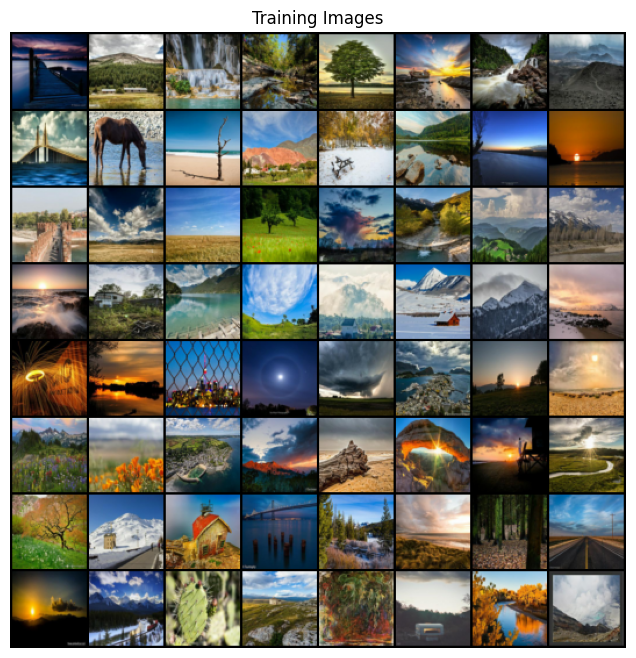

In [4]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [185]:
class Discriminator(nn.Module):
    def __init__(self, img_dim):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_dim, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.disc(x)


class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, img_dim),
            nn.Tanh(),  # normalize inputs to [-1, 1] so make outputs [-1, 1]
        )

    def forward(self, x):
        x = self.gen(x)
        return x.view(-1, 1, 28, 28) 

In [186]:
z_dim = 50
img_dim = 1*28*28
in_features = 1

In [187]:
model_G

Generator(
  (gen): Sequential(
    (0): Linear(in_features=50, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Tanh()
  )
)

In [190]:
model_G = Generator(z_dim, img_dim)

dum = torch.zeros(1, z_dim)

res = model_G(dum)
print(res.shape)

torch.Size([1, 1, 28, 28])


In [189]:
model_D = Discriminator(img_dim)

dum = torch.zeros(1, 1, 28, 28)

res = model_D(dum)
print(res.shape)

torch.Size([1, 1])


In [43]:
from models.simplegan import Generator, Discriminator






model_G = Generator(z_dim, img_dim)
summary(model_G, (1, 50))

TypeError: Discriminator.__init__() missing 1 required positional argument: 'in_features'

In [14]:
img_dim

784

In [41]:
from models.dcgan import Generator, Discriminator, weights_init

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

nc = 3
nz = 100
ngf = 64
ndf = 64

model_G = Generator(nz, ngf, nc).to(device)
model_G.apply(weights_init)
summary(model_G, (nz, image_size, image_size))

model_D = Discriminator(nc, ndf).to(device)
model_D.apply(weights_init)
summary(model_D, (nc, image_size, image_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1          [-1, 512, 67, 67]         819,200
       BatchNorm2d-2          [-1, 512, 67, 67]           1,024
              ReLU-3          [-1, 512, 67, 67]               0
   ConvTranspose2d-4        [-1, 256, 134, 134]       2,097,152
       BatchNorm2d-5        [-1, 256, 134, 134]             512
              ReLU-6        [-1, 256, 134, 134]               0
   ConvTranspose2d-7        [-1, 128, 268, 268]         524,288
       BatchNorm2d-8        [-1, 128, 268, 268]             256
              ReLU-9        [-1, 128, 268, 268]               0
  ConvTranspose2d-10         [-1, 64, 536, 536]         131,072
      BatchNorm2d-11         [-1, 64, 536, 536]             128
             ReLU-12         [-1, 64, 536, 536]               0
  ConvTranspose2d-13        [-1, 3, 1072, 1072]           3,072
             Tanh-14        [-1, 3, 107

In [42]:
learning_rate = 0.0001
learning_rate_G = learning_rate
learning_rate_D = learning_rate

fixed_noise = torch.randn(4, nz, 1, 1, device = device)
real_label = 1.
fake_label = 0.

criterion = nn.BCELoss()
optimizerG = optim.Adam(model_G.parameters(), lr = learning_rate_G, betas=(0.5, 0.999))
optimizerD = optim.Adam(model_D.parameters(), lr = learning_rate_D, betas=(0.5, 0.999))

inception = True
if inception:
    inception = InceptionScore(normalize = True)
    inception.to(device)
else:
    inception = None
    
frechet = True
if frechet:
    frechet = FrechetInceptionDistance(feature=2048)
    frechet.to(device)
else:
    frechet = None

Epoch 0/3: 100%|████████████████████████████████████████████████████████████▊| 7338/7360 [01:25<00:00, 85.63Sample(s)/s]


[(3.303619861602783, 0.07368848472833633)]
[444.73358154296875]


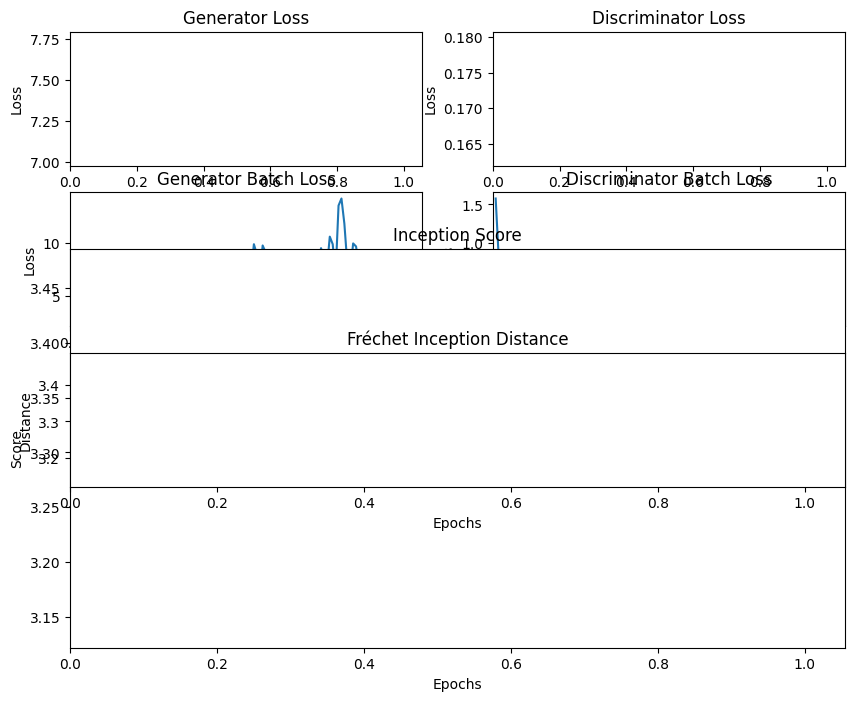

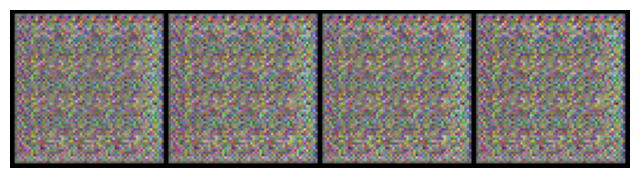

Epoch 1/3: 100%|████████████████████████████████████████████████████████████▊| 7338/7360 [01:26<00:00, 85.28Sample(s)/s]


[(3.303619861602783, 0.07368848472833633), (3.301321506500244, 0.11132006347179413)]
[444.73358154296875, 508.517822265625]


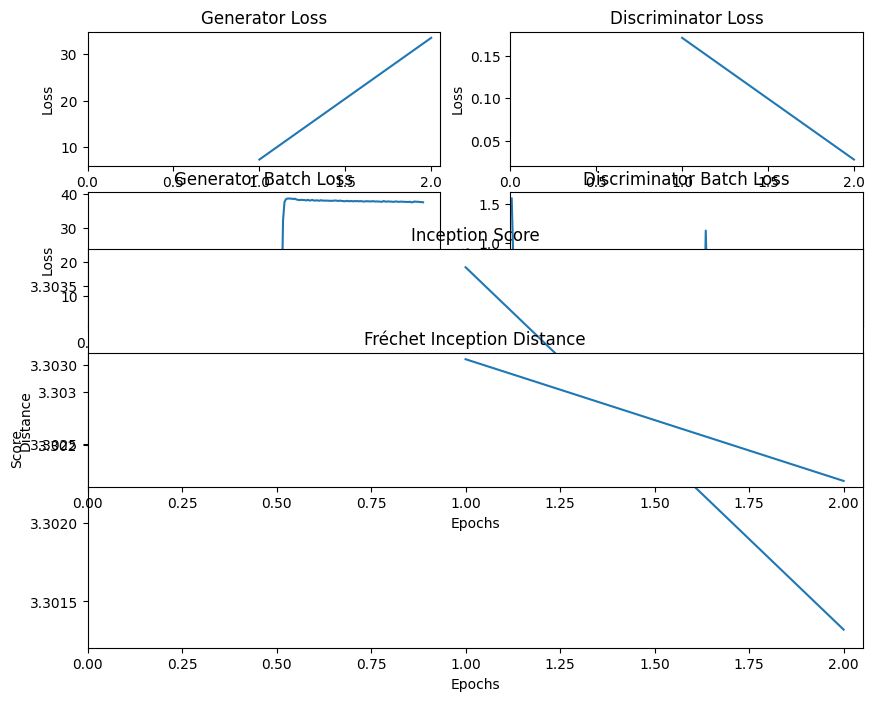

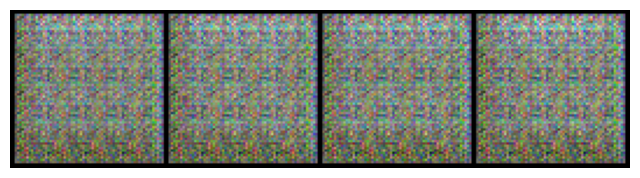

Epoch 2/3: 100%|████████████████████████████████████████████████████████████▊| 7338/7360 [01:26<00:00, 85.26Sample(s)/s]


[(3.303619861602783, 0.07368848472833633), (3.301321506500244, 0.11132006347179413), (3.3023877143859863, 0.11656691879034042)]
[444.73358154296875, 508.517822265625, 516.4962158203125]


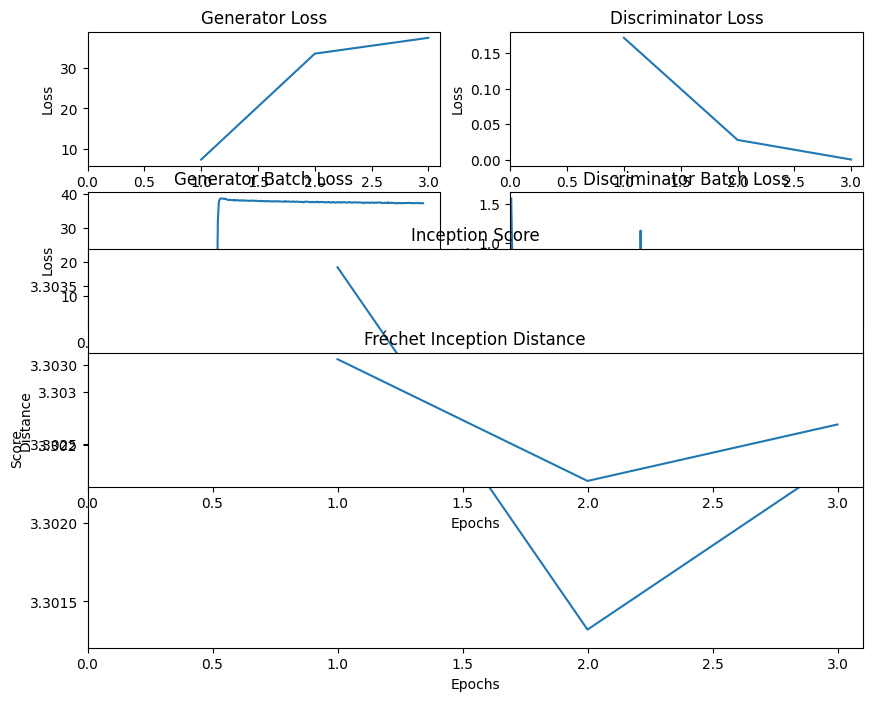

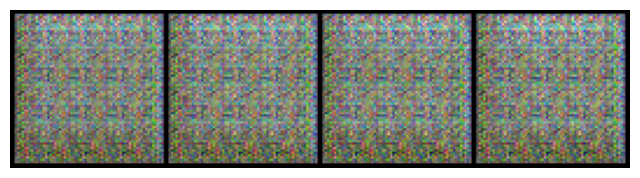

In [43]:
n_epochs = 3
show = True

G_loss, D_loss, G_loss_batch, D_loss_batch, inception_score, frechet_inception_distance = train(model_G, model_D, dataloader, n_epochs, batch_size, learning_rate_G, learning_rate_D, inception, frechet, show, device)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


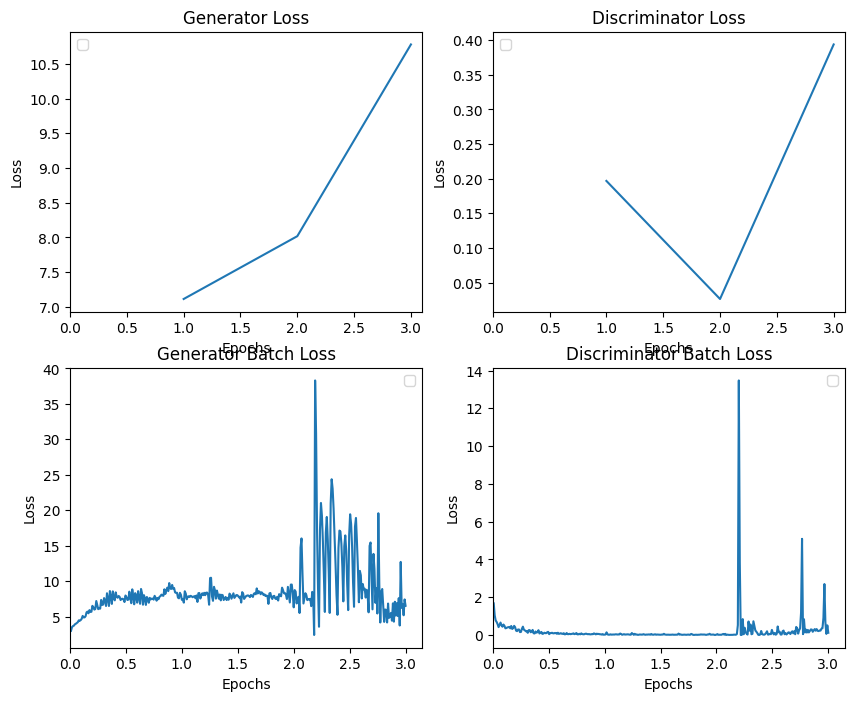

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

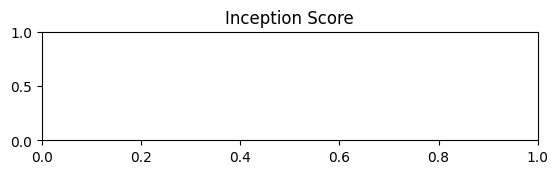

In [15]:
show_metrics(G_loss, D_loss, G_loss_batch, D_loss_batch, inception, frechet)

In [40]:
def train(model_G, model_D, dataloader, n_epochs, batch_size, learning_rate_G, learning_rate_D, inception, frechet_distance, show, device):

    img_list = []
    G_loss = []
    D_loss = []
    G_loss_batch = []
    D_loss_batch = []
    if inception is not None:
        inception_score = []
    else:
        inception_score = None
    if frechet is not None:
        frechet_inception_distance = []
    else:
        frechet_inception_distance = None
    if inception or frechet is not None:
        resize = transforms.Resize(299)

    iters = 0

    n_batch_train = len(dataloader)
    n_train = n_batch_train*batch_size

    for epoch in range(n_epochs):

        model_G.train()
        model_D.train()
        
        G_epoch_loss = 0
        D_epoch_loss = 0

        with tqdm(total=n_train, desc=f'Epoch {epoch}/{n_epochs}', unit='Sample(s)') as pbar:                
            for i, batch in enumerate(dataloader):

                ############################
                # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
                ###########################

                model_D.zero_grad()

                real_cpu, _ = batch
                real_cpu = real_cpu.type(torch.float32).to(device)
                b_size = real_cpu.shape[0]
                label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

                output = model_D(real_cpu).view(-1)

                errD_real = criterion(output, label)
                errD_real.backward()
                D_x = output.mean().item()

                noise = torch.randn(b_size, nz, 1, 1, device=device)
                fake = model_G(noise)
                label.fill_(fake_label)

                output = model_D(fake.detach()).view(-1)

                errD_fake = criterion(output, label)
                errD_fake.backward()
                D_G_z1 = output.mean().item()
                errD = errD_real + errD_fake
                optimizerD.step()

                ############################
                # (2) Update G network: maximize log(D(G(z)))
                ###########################

                model_G.zero_grad()
                label.fill_(real_label)

                output = model_D(fake).view(-1)

                errG = criterion(output, label)
                errG.backward()
                D_G_z2 = output.mean().item()
                optimizerG.step()

                G_epoch_loss += errG.item()
                D_epoch_loss += errD.item()
                G_loss_batch.append(errG.item())
                D_loss_batch.append(errD.item())
                
                #check if dimensions are 299 before resize ??
                if inception or frechet is not None:
                    resize = transforms.Resize(299)
                    resized_real = (resize(real_cpu)*255).type(torch.uint8)
                if inception is not None:
                    inception.update(resized_real)
                if frechet is not None:
                    resized_fake = (resize(fake)*255).type(torch.uint8)
                    frechet.update(resized_real, real=True)
                    frechet.update(resized_fake.type(torch.uint8), real=False)
                
                pbar.update(b_size)

        with torch.no_grad():
            fake = model_G(fixed_noise).detach().cpu()
        grid = vutils.make_grid(fake, padding=2, normalize=True, nrow = 8)
        img_list.append(grid)

        G_loss.append(G_epoch_loss/n_batch_train)
        D_loss.append(D_epoch_loss/n_batch_train)
    
        if inception is not None:
            score = inception.compute()
            inception_score.append((score[0].item(), score[1].item()))
            inception.reset()
            print(inception_score)
            
        if frechet is not None:
            frechet_inception_distance.append(frechet.compute().item())
            frechet.reset()
            print(frechet_inception_distance)
            
        if show:
            show_metrics(G_loss, D_loss, G_loss_batch, D_loss_batch, inception_score, frechet_inception_distance)

            fig = plt.figure(figsize=(8,8))
            plt.axis("off")
            plt.imshow(np.transpose(grid, (1,2,0)), cmap = 'gray')
            plt.show()
            
    return G_loss, D_loss, G_loss_batch, D_loss_batch, inception_score, frechet_inception_distance

In [ ]:
random_noise = torch.randn(64, nz, 1, 1, device = device)
#random_noise = other_noise.reshape(64,-1)
fake = model_G(random_noise).detach().cpu()
grid = vutils.make_grid(fake, normalize = True, nrow = 8)

fig = plt.figure(figsize=(12,12))
plt.imshow(np.transpose(grid, (1,2,0)))
plt.show()

In [3]:
def show_metrics(G_loss, D_loss, G_loss_batch, D_loss_batch, inception_score = None, frechet_inception_distance = None):
    
    i = 0
    if inception_score is not None:
        i += 1
    if frechet_inception_distance is not None:
        i += 1
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2+i,2,1)
    plt.title("Generator Loss")
    plt.plot(range(1, len(G_loss)+1), G_loss)
    plt.xlim(0, None)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.legend()

    plt.subplot(2+i,2,2)
    plt.title("Discriminator Loss")
    plt.plot(range(1, len(D_loss)+1), D_loss)
    plt.xlim(0, None)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.legend()
    
    plt.subplot(2+i,2,3)
    plt.title("Generator Batch Loss")
    linspace = np.linspace(len(G_loss)/len(G_loss_batch), len(G_loss), num = len(G_loss_batch))
    plt.plot(linspace, G_loss_batch)
    plt.xlim(0, None)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.legend()

    plt.subplot(2+i,2,4)
    plt.title("Discriminator Batch Loss")
    plt.plot(linspace, D_loss_batch)
    plt.xlim(0, None)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.legend()
    
    if inception_score is not None:
        
        i -= 1
        plt.subplot(2+i,2,(3+i,4+i))
        plt.title("Inception Score")
        plt.plot(range(1, len(inception_score)+1), [score[0] for score in inception_score])
        plt.xlim(0, None)
        plt.xlabel("Epochs")
        plt.ylabel("Score")
        #plt.legend()
        i += 1
                
    if frechet_inception_distance is not None:
        
        if inception_score is None:
            i -= 1
        plt.subplot(2+i,2,(3+i,4+i))
        plt.title("Fréchet Inception Distance")
        plt.plot(range(1, len(inception_score)+1), [score[0] for score in inception_score])
        plt.xlim(0, None)
        plt.xlabel("Epochs")
        plt.ylabel("Distance")
        #plt.legend()
        if inception_score is None:
            i += 1
    
    plt.show()